# 1. EDA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# 주피터 셀을 브라우저 크기대로 늘려주는 세팅
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## (1) 데이터 준비

In [2]:
df = pd.read_csv('C:/Users/Admin/Desktop/OSSP_final_data_filled_with_knn_with_LABEL.csv', encoding = 'cp949')

In [3]:
df.head()

,Unnamed: 0,기준_년_코드,기준_분기_코드,상권코드_0,상권코드_1,상권코드_2,상권코드_3,상권코드_4,상권코드_5,상권코드_6,...,상권코드_1495,총_유동인구_수,아파트_단지_수,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,폐업률
0,0,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,90544.0,14.48,82.273333,2.942853e+08,24.0,52.0,1.671959e+11,15904.0,2.587177
1,1,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3026454.0,22.00,89.000000,5.273471e+08,8221.0,242.0,1.546181e+11,24375.0,3.026257
2,2,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4033679.0,5.00,39.000000,1.120979e+08,1924.0,327.0,2.592398e+11,32935.0,2.081362
3,3,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3262023.0,8.00,53.000000,2.379674e+08,2427.0,165.0,2.466393e+11,6054.0,2.107308
4,4,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3764785.0,14.48,82.273333,2.942853e+08,1104.0,593.0,3.766214e+11,104830.0,2.163080


In [4]:
df.columns

Index(['Unnamed: 0', '기준_년_코드', '기준_분기_코드', '상권코드_0', '상권코드_1', '상권코드_2',
       '상권코드_3', '상권코드_4', '상권코드_5', '상권코드_6',
       ...
       '상권코드_1495', '총_유동인구_수', '아파트_단지_수', '아파트_평균_면적', '아파트_평균_시가',
       '총 상주인구 수', '집객시설_수', '당월_매출_금액', '총_직장_인구_수', '폐업률'],
      dtype='object', length=1508)

In [5]:
# column 재설정
columns = ['기준_년_코드', '기준_분기_코드', '총_유동인구_수', '아파트_단지_수', '아파트_평균_면적', '아파트_평균_시가', 
           '총 상주인구 수', '집객시설_수', '당월_매출_금액', '총_직장_인구_수', '폐업률']
df = df[columns]

In [6]:
df.head(3)

,기준_년_코드,기준_분기_코드,총_유동인구_수,아파트_단지_수,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,폐업률
0,2020.0,2.0,90544.0,14.48,82.273333,2.942853e+08,24.0,52.0,1.671959e+11,15904.0,2.587177
1,2020.0,2.0,3026454.0,22.00,89.000000,5.273471e+08,8221.0,242.0,1.546181e+11,24375.0,3.026257
2,2020.0,2.0,4033679.0,5.00,39.000000,1.120979e+08,1924.0,327.0,2.592398e+11,32935.0,2.081362


## (2) EDA

In [7]:
# 연도별, 분기별 추출
df_2020 = df[df['기준_년_코드'] == 2020]
df_2020_1 = df_2020[df_2020['기준_분기_코드'] == 1].drop(['기준_년_코드', '기준_분기_코드'], axis = 1)
df_2020_2 = df_2020[df_2020['기준_분기_코드'] == 2].drop(['기준_년_코드', '기준_분기_코드'], axis = 1)

In [8]:
# seaborn 한글 사용을 위한 세팅
plt.rcdefaults()
sns.set(rc={'figure.figsize':(10,10)})
plt.rcParams["font.family"] = 'Haansoft Dotum'
plt.rcParams['axes.unicode_minus'] = False

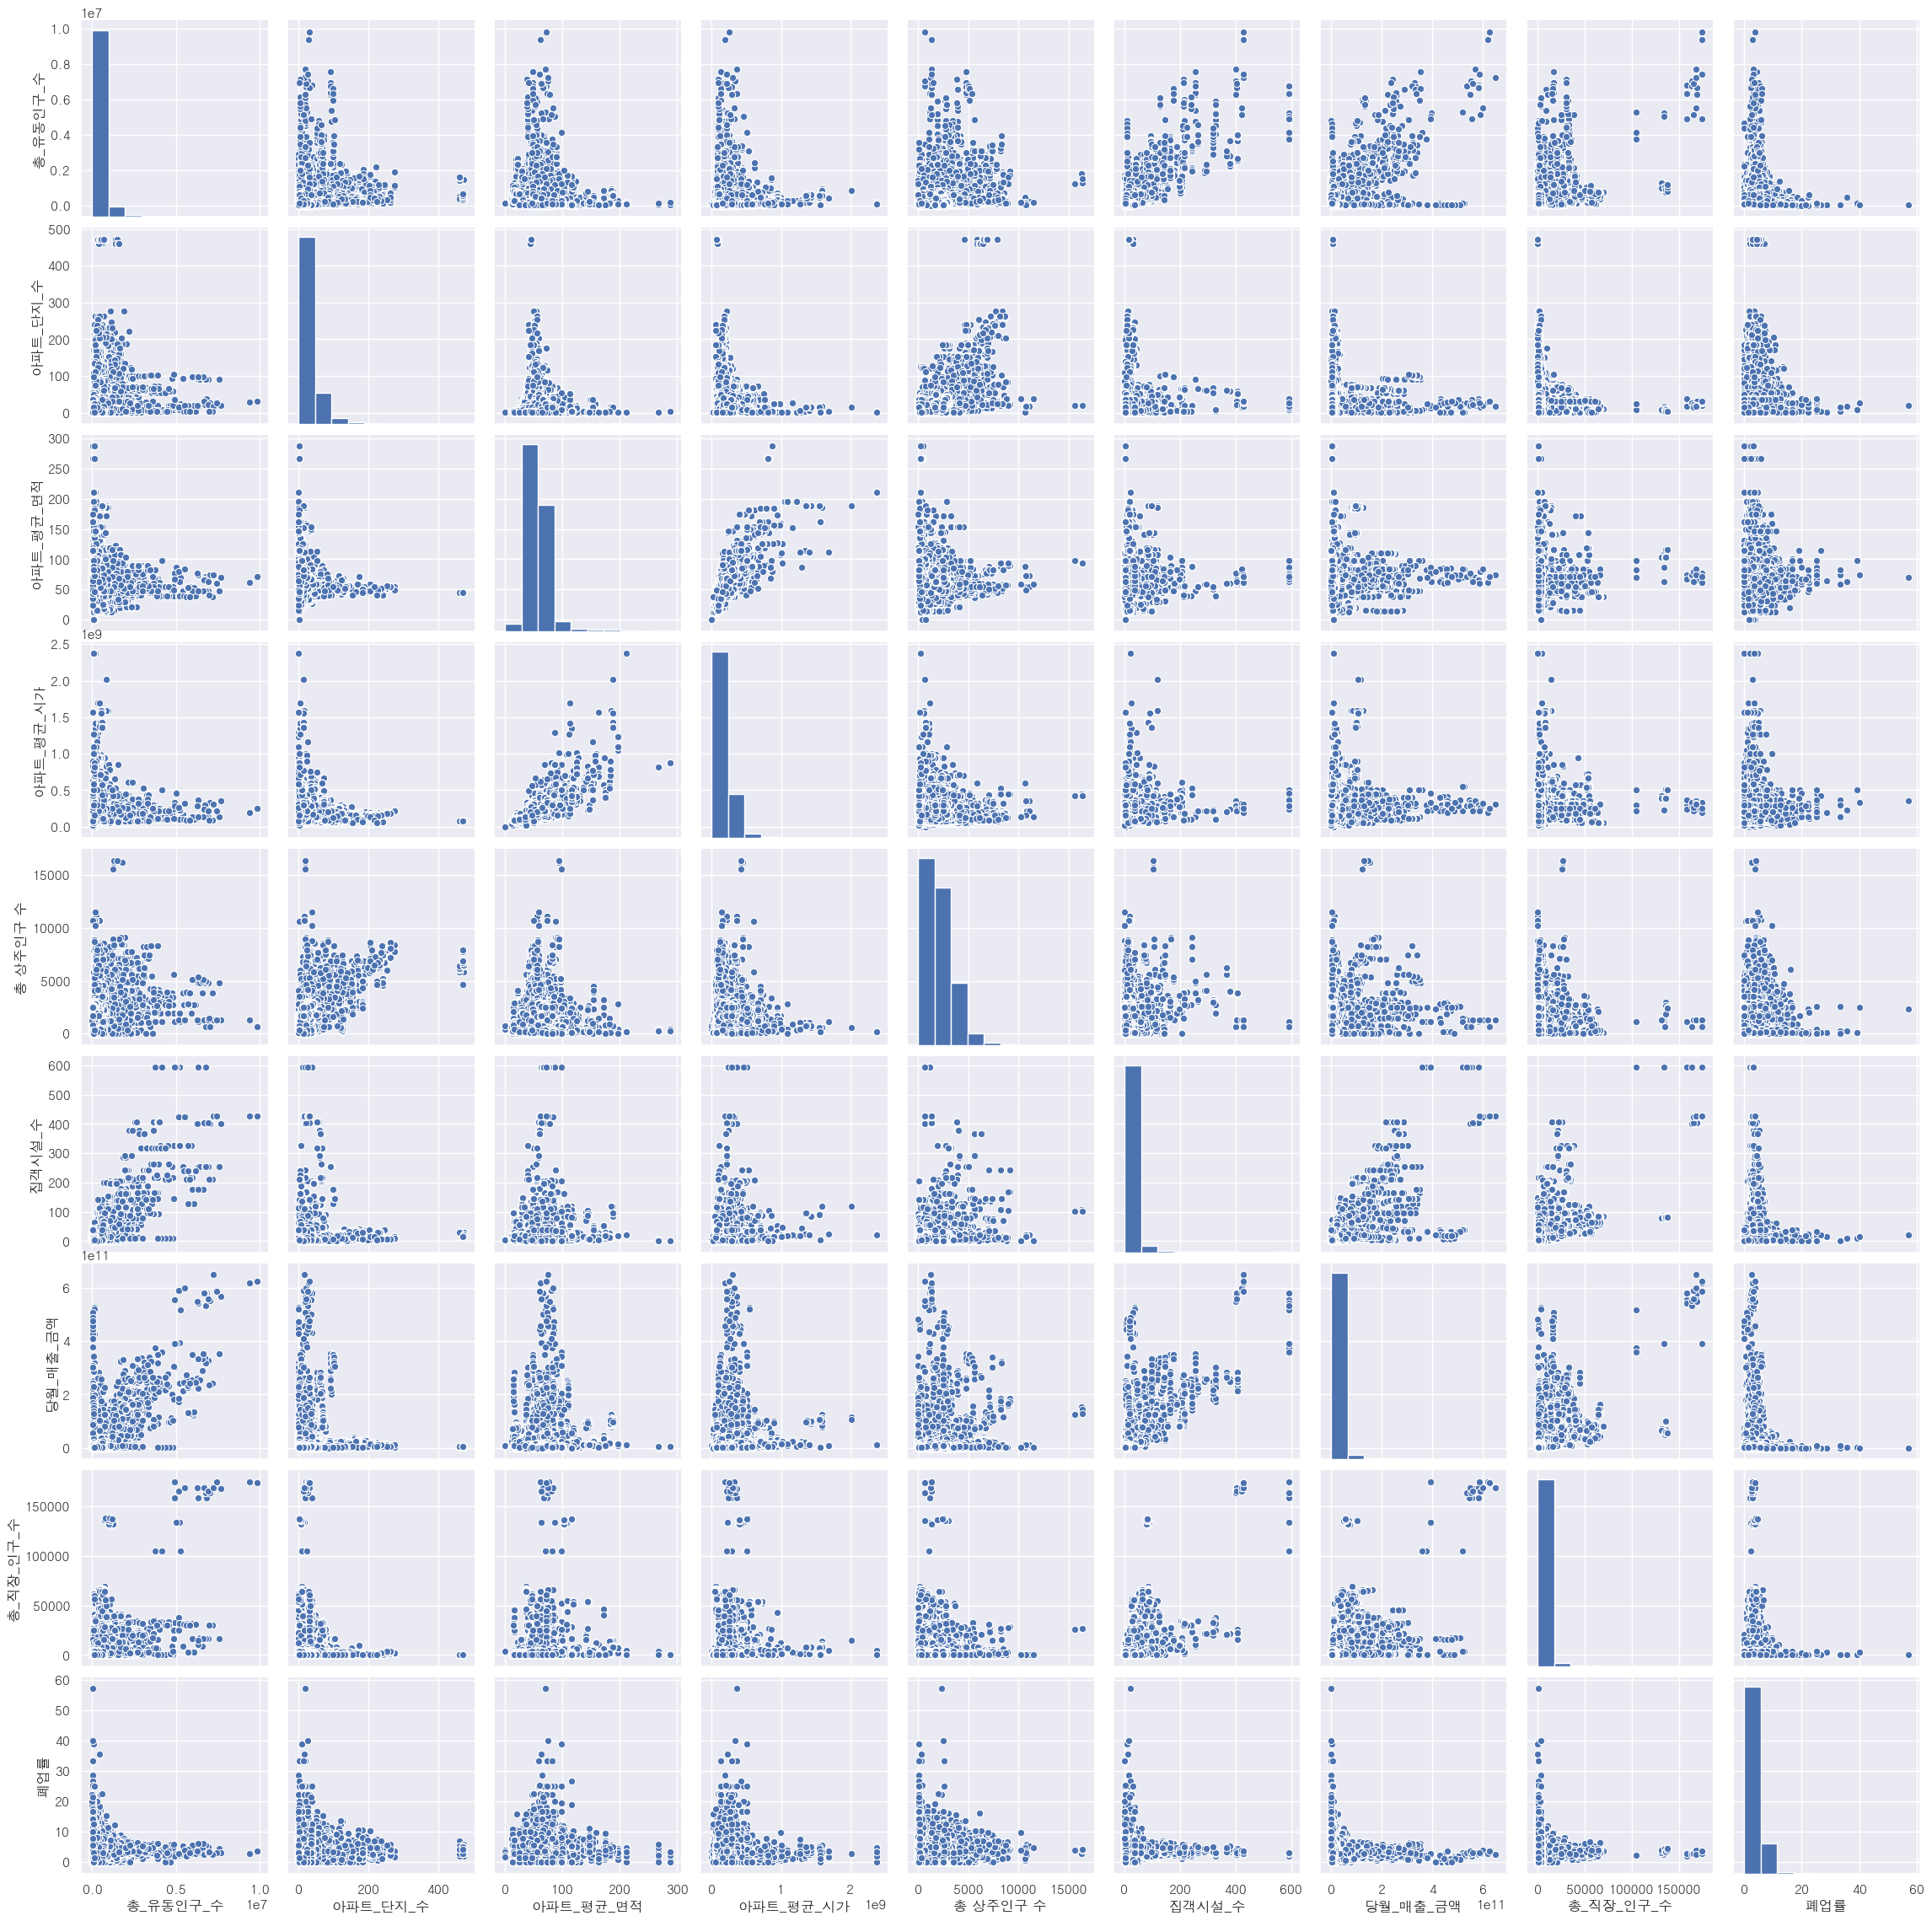

In [9]:
# pairplot
df_x = df.drop(['기준_년_코드', '기준_분기_코드'], axis = 1)
sns.pairplot(df_x)

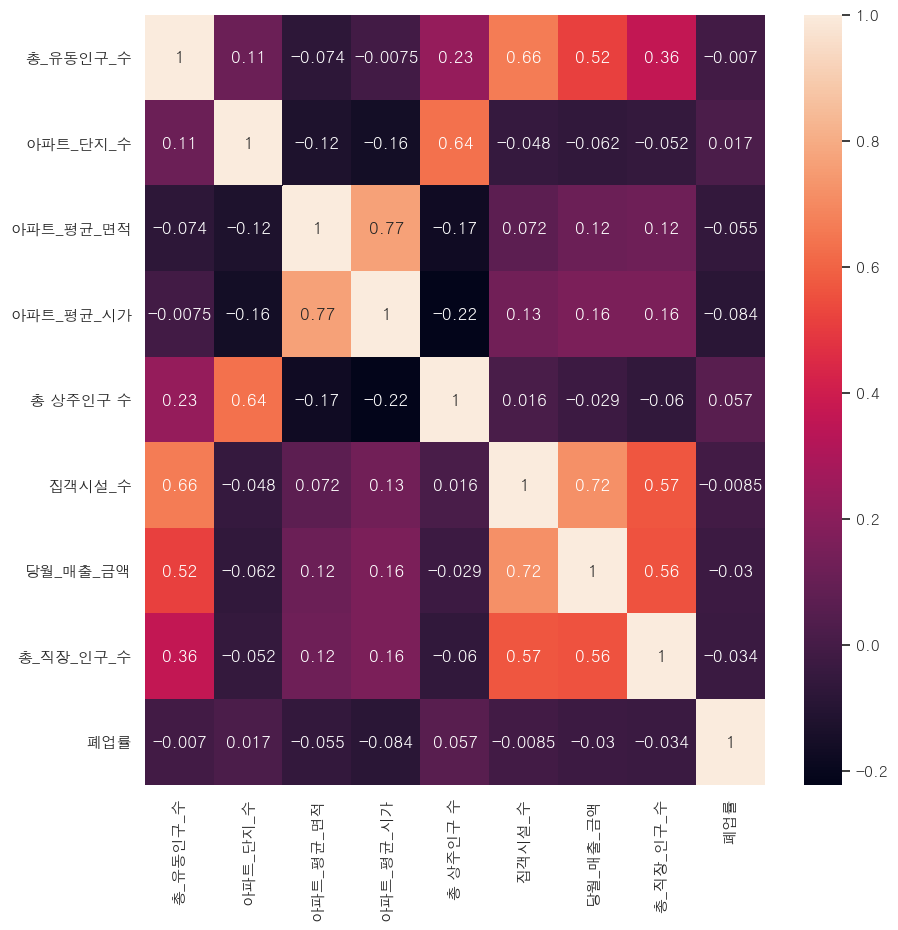

In [30]:
sns.heatmap(data = df_x.corr(), annot = True)

In [27]:
from scipy.stats import pearsonr

r, p = pearsonr(df_x['총 상주인구 수'], df_x['폐업률'])

print("상관계수 : {}\np-value : {}".format(r,p))

상관계수 : 0.057040477912113655
p-value : 3.9251970901806627e-25
